# Nonlinear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
%matplotlib inline

### Turbo charged diesel engines
A turbocharger in a diesel engine works so that a certain fraction f of the exhaust gases is routed through a small turbine which is directly connected to an air compressor (supercharger). Air compressors increase the pressure of the gas mixture entering the engine cylinder, resulting in more fuel (mixed with air) getting burned every cycle. The way to get a higher pressure rise in the supercharger is to let a larger fraction of the exhaust gases pass through the turbine. The theoretical maximum exhaust fraction $f$ is 1 but the supercharger has practical limits on how high a pressure ratio it can create.

Below is a table containing a few readings from a turbocharger unit that shows the pressure rise associated with a certain fraction number $f$. 

| Pressure ratio $r_p$ | 1.5  | 2    | 4    | 7    | 9    | 10   | 12   | 14   | 15   |
|----------------------|------|------|------|------|------|------|------|------|------|
| Exhaust fraction $f$ | 0.15 | 0.28 | 0.46 | 0.57 | 0.62 | 0.64 | 0.68 | 0.69 | 0.70 |

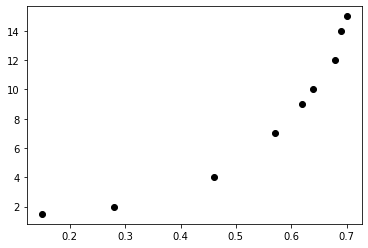

In [9]:
rpdata = np.array([1.5,2.,4.,7.,9.,10.,12.,14.,15.])
fdata = np.array([0.15,0.28,.46,.57,.62,.64,0.68,.69,.70])

plt.plot(fdata, rpdata,'ko');

### To do
- Fit with linear fit
- Fit with polynomial fit
- Fit with semilog regression - exponential fit
- Use scipy curve fit for exponential fit
- Use scipy curve fit for general power law
- Use scipy curve fit for $r_p = \frac{a}{b- f}$.

[ 146.23596007 -123.99139413   38.74649186   -2.09770642]


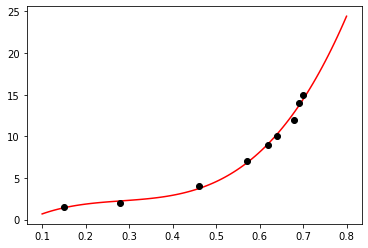

In [12]:
coeffs = np.polyfit(fdata,rpdata,deg=3)

fs = np.linspace(0.1,0.8,101)
ps = coeffs[0]*fs*fs*fs + coeffs[1]*fs*fs + coeffs[2]*fs + coeffs[3]

plt.plot(fs,ps,'r',fdata,rpdata,'ko');

print(coeffs)

[ 1.8495401  -0.17548608]


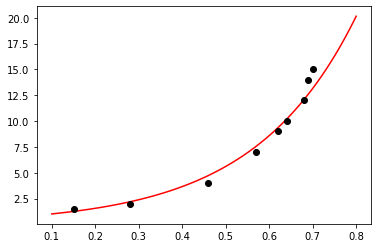

In [17]:
#plt.semilogy(fdata,rpdata,'ko');

coeffs = np.polyfit(fdata,np.log10(rpdata),deg=1)

fs= np.linspace(0.1,0.8,101)
rs = 10**(coeffs[0]*fs + coeffs[1])

plt.plot(fs,rs,'r',fdata,rpdata,'ko');
print(coeffs)

[0.33178209 2.33463438]


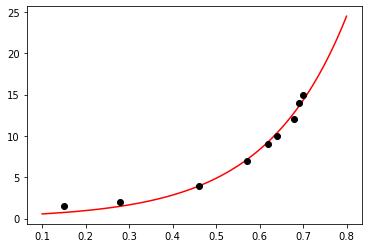

In [18]:
#to use curve fit we need a functional form with parameters, data, and an initial guess for the parameters

def func(f,a,b):
    output = a*10**(b*f)
    return(output)

popt, pcov = curve_fit(func,fdata,rpdata,(1,2))

print(popt)

aopt, bopt = popt[0],popt[1]

fs = np.linspace(0.1,0.8,101)
rs = func(fs,aopt,bopt)

plt.plot(fs,rs,'r',fdata,rpdata,'ko');

[1.49861732 0.79880881]


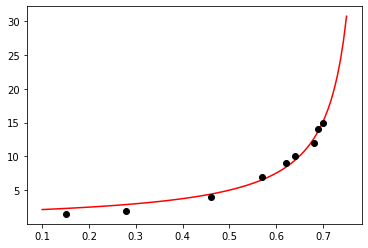

In [21]:
def func2(f,a,b):
    output = a/(b-f)
    return(output)

popt, pcov = curve_fit(func2,fdata,rpdata,(2,.8))

print(popt)

aopt, bopt = popt[0],popt[1]

fs = np.linspace(0.1,0.75,101)
rs = func2(fs,aopt,bopt)

plt.plot(fs,rs,'r',fdata,rpdata,'ko');

Practically, the supercharger cannot sustain a pressure ratio higher than 9. 
- Plot the given data and all your fits till that pressure, and corresponding fraction f.
- Comment on which of these is the best fit given the practical constraints and what you see in the plots

###  Time and temperature
The data file time_temp_data.csv contains temperature data in degrees Celcius for four days recorded every hour. 

- Download this file to your working directory for this homework.
- Load the file into a numpy array using the [loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) command in the numpy library. 
- Plot the data. Make sure to label axes.
- Describe the pattern of the data in a text cell.
- Come up with a functional relationship that describes the temperature as a function of time that uses a trigonometric function. You'll need at least three parameters.
- Use a text cell to describe and justify your initial guesses for these parameter values. 
- Use the scipy curve_fit function to get parameter values.
- Plot your fit curve and the data together.

### Ag data
Below are data that show how farm yields of corn crops in bushels per acre ($Y$) change with the amount of applied nitrogen ($N$).

- Plot the data.
- Use the curve fit function to fit a function in the form $Y = \frac{A N}{B + N}$.
 - Describe what the parameters $A$ and $B$ are here and include their units.
- Use the curve fit function to fit a function in the form $Y = \frac{A}{1 + Be^{-CN}}$.
 - Describe what the parameters $A,B$ and $C$ are here and include their units.
- Which model is better? Calculate AIC for each.
 - AIC = Aikake information criterion
 - $AIC = n ln(RSS/n) + 2(k+1)$, where $n$ is the number of data points, $k$ the number of parameters, and $RSS$ the residual sum of squares.

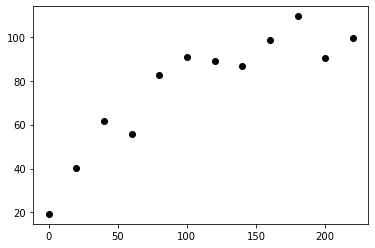

In [22]:
appNdata = np.linspace(0.,220.,12)
Ydata = np.array([19.3,40.1,61.7,55.8,82.4,90.8,89.2,86.9,98.6,109.4,90.5,99.7])

plt.plot(appNdata,Ydata,'ko');

(12,)


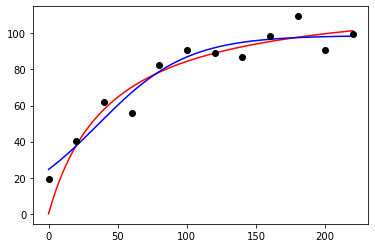

In [24]:
def agfunc1(n,a,b):
    return(a*n/(b+n))

popt, pcov = curve_fit(agfunc1,appNdata,Ydata,(100,30))

aopt,bopt = popt[0],popt[1]

ns = np.linspace(0,220.,1001)
ys = agfunc1(ns,aopt,bopt)


def agfunc2(n,a,b,c):
    return(a/(1+b*np.exp(-c*n)))

popt, pcov = curve_fit(agfunc2,appNdata,Ydata,(100,5,.1))

aopt,bopt,copt = popt[0],popt[1],popt[2]

ns = np.linspace(0,220.,1001)
ys2 = agfunc2(ns,aopt,bopt,copt)

plt.plot(ns,ys,'r',ns,ys2,'b',appNdata,Ydata,'ko');

print(np.shape(appNdata))


In [26]:
#get residuals and AIC
n = len(appNdata)

f1res = np.zeros(np.shape(appNdata))
for i in range(len(f1res)):
    f1res[i] = Ydata[i] - agfunc1(appNdata[i],aopt,bopt)
f1rss = np.sum(f1res**2)
print(f1rss)  #RSS Residual sum of squares
#get func1 AIC   #AIC = n ln(RSS/n) + 2(k+1)
k = 2
f1aic = n*np.log(f1rss/n) + 2*(k+1)
print(f1aic)


f2res = np.zeros(np.shape(appNdata))
for i in range(len(f2res)):
    f2res[i] = Ydata[i] - agfunc2(appNdata[i],aopt,bopt,copt)
f2rss = np.sum(f2res**2)
print(f2rss)  #RSS Residual sum of squares
#get func1 AIC   #AIC = n ln(RSS/n) + 2(k+1)
k = 3
f2aic = n*np.log(f2rss/n) + 2*(k+1)
print(f2aic)

5362.733201202928
79.22786879887838
547.8169290485416
53.85241412319845


## Very beary berry patches

Consider a bear eating blackberries. The blackberries grow on bushes in patches. The more time the bear spends in a patch the more berries it can find, but it takes more time to find each berry. The bear also knows it will take some time to find and travel to the next berry patch. When should the bear leave the patch and go the next one?

If the bear stays a long time at a patch, it will get the most berries from the patch, but can visit few patches each day. If the bear stays a short time at a patch, they can get the easiest berries to collect from the patch, but spends much of its time traveling to new patches.

It is clear here we have some kind of optimization problem, but what is the objective function?
The bear's task is to eat the most berries each day so it should maximize its **rate per visit**, which includes the travel time between patches.

The rate food is collected is given by
\begin{align*}R(t) &= \frac{\mbox{food per patch}}{\mbox{total time per patch}}\\
&= \frac{\mbox{food per patch}}{\mbox{time in patch } + \mbox{ travel time}}\\
&= \frac{F(t)}{t + \tau}\end{align*}

#### Task 1.
Assume $F(t) = \frac{t}{t + 0.5}$ and $\tau = 1.$ Find the optimal time to stay at the patch.

#### Task 2.
Let $F(t)$ just be $F(t)$. What is true of the relationship between $F(t)$ and $R(t)$ at the critical points? What does this interpretation look like graphically?

### Thm (Marginal Value Theorem)
Leave when the derivative of $F$, the instantaneous rate of change, is equal to the average rate of change, $R(t)$. Leave when you can do better elsewhere.

#### Task 3.
- Consider jelly beans to be berries and the bowls to be patches. Collect data on the time it takes to collect each berry from the bowl, e.g. collect berry 1 at 1.3 sec, berry 2 at 3.4 sec, etc.
- Enter the time and berry # data as arrays.
- Plot the data.
 - Make a plot of number of candies collected vs. time and time vs. number of candies collected.
 - Which plot more closely resembles what we used above?
- What properties do you see in the graph of you/your group's data?
- Come up with at least three functional forms that share these properties.
- For each function, fit the parameters using the curve_fit function.
- After you've fit each function, perform the optimization analysis above to find the optimal time to leave the patch. Assume the travel time is the mean of the times to find berries 3, 4, and 5.
- Consider how your optimal time changed (or not) with each of your functional forms. Can you explain this behavior?


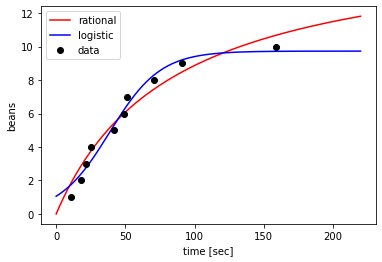

In [29]:
tdata = np.array([10.57,17.72,21.29,25.14,41.97,48.92,51.32,70.37,90.76,158.66])
fdata = np.array([1,2,3,4,5,6,7,8,9,10])

#plt.plot(tdata,fdata,'kd');

def berryfunc1(t,a,b):
    return(a*t/(b+t))

popt, pcov = curve_fit(berryfunc1,tdata,fdata,(10,30))

aopt,bopt = popt[0],popt[1]

ts = np.linspace(0,220.,1001)
fs = agfunc1(ts,aopt,bopt)


def berryfunc2(t,a,b,c):
    return(a/(1+b*np.exp(-c*t)))

popt, pcov = curve_fit(agfunc2,tdata,fdata,(100,10,.1))

aopt,bopt,copt = popt[0],popt[1],popt[2]

ts = np.linspace(0,220.,1001)
fs2 = agfunc2(ts,aopt,bopt,copt)

plt.plot(ts,fs,'r',ts,fs2,'b',tdata,fdata,'ko');
plt.xlabel('time [sec]');
plt.ylabel('beans');
plt.legend(['rational','logistic','data']);